# Proyecto Clasificación Si un Pasajero sobrevivirá en el desastre del Titanic

En este proyecto tenemos por objetivo clasificar si un pasajero, cumpliendo ciertas características, sobrevivirá o no

## Data:
La data que poseemos es extraída de Kaggle

* survival 	Survival 	0 = No, 1 = Yes
* pclass 	Ticket class 	1 = 1st, 2 = 2nd, 3 = 3rd
* sex 	Sex 	
* Age 	Age in years 	
* sibsp 	# of siblings / spouses aboard the Titanic 	
* parch 	# of parents / children aboard the Titanic 	
* ticket 	Ticket number 	
* fare 	Passenger fare 	
* cabin 	Cabin number 	
* embarked 	Port of Embarkation 	C = Cherbourg, Q = Queenstown, S = Southampton

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Analysis

In [2]:
df = pd.read_csv('../proyecto_salarios/data/train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
#cambiaremos el orden del label
df['Target'] = df.Survived

In [6]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Target
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [7]:
df.drop([ 'Survived'], axis = 1, inplace = True)

In [8]:
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Target
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


## Realizaremos un gráfico que nos mostrará la cantidad de pasajeros que había en el barco según la clase

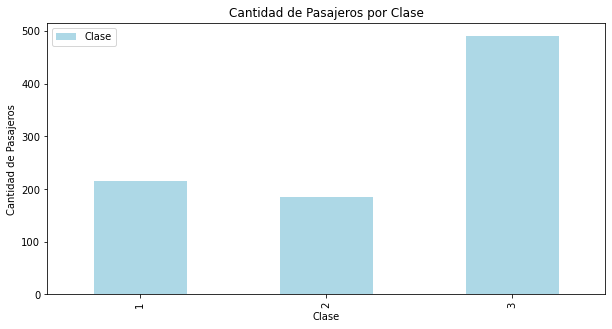

In [9]:
df['Pclass'].value_counts().sort_index().plot(kind = 'bar', legend = True, figsize = (10, 5), color = 'lightblue')
plt.legend(['Clase'])
plt.xlabel('Clase')
plt.ylabel('Cantidad de Pasajeros')
plt.title('Cantidad de Pasajeros por Clase');

Ahora haremos un crosstab para ver algún patrón con respecto al numero de sobrevivientes (y de fallecidos) <b> según la clase</b> Luego haremos otro crosstab que nos dirá <b> la cantidad de varones y damas que sobrevivieron y que no </b>

In [10]:
pd.crosstab(df['Pclass'], df['Target']) #por clase

Target,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [11]:
pd.crosstab(df['Age'], df['Target']) #por clase

Target,0,1
Age,,
0.42,0,1
0.67,0,1
0.75,0,2
0.83,0,2
0.92,0,1
...,...,...
70.00,2,0
70.50,1,0
71.00,2,0


In [12]:
pd.crosstab(df['Sex'], df['Target']) #por sexo

Target,0,1
Sex,,
female,81,233
male,468,109


En ambos cruces, podemos ver tanto que la tercera clase y los hombres fueron los que más fallecieron en la tragedia del Titanic. Esto nos indica un patrón

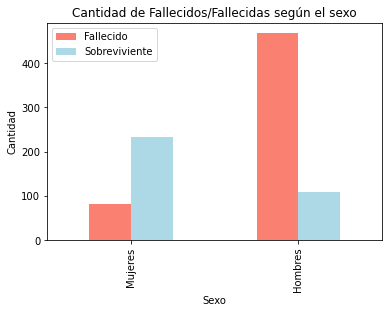

In [13]:
#vamos a graficar para tener un respaldo visual más potente
ax = pd.crosstab(df['Sex'], df['Target']).plot(kind = 'bar', color = ['salmon', 'lightblue'])
plt.title('Cantidad de Fallecidos/Fallecidas según el sexo')
plt.xlabel('Sexo')
plt.ylabel('Cantidad')
plt.legend(['Fallecido', 'Sobreviviente'])
ax.set_xticklabels(['Mujeres','Hombres']);

vamos a hacer consultas por la edad, lo que tenemos que tener en cuenta, es que viene en formato float, por lo que tendremos que convertirlo a int para ahorrar memoria

In [14]:
#consultamos por los nulos
df['Age'].isna().sum()

177

hay 177 nulos, lo que podemos hacer en este caso, al tratarse de un dato numerico, podremos rellenar con la edad promedio que poseemos

In [15]:
df['Age'].fillna(df['Age'].mean(), inplace = True) #llenamos con la media de edad

In [16]:
df['Age'].isna().sum() #consultamos y tenemos 0 nulos

0

In [17]:
df['Age'] = df['Age'].astype(int) #ahora podremos convertir a int sin problemas

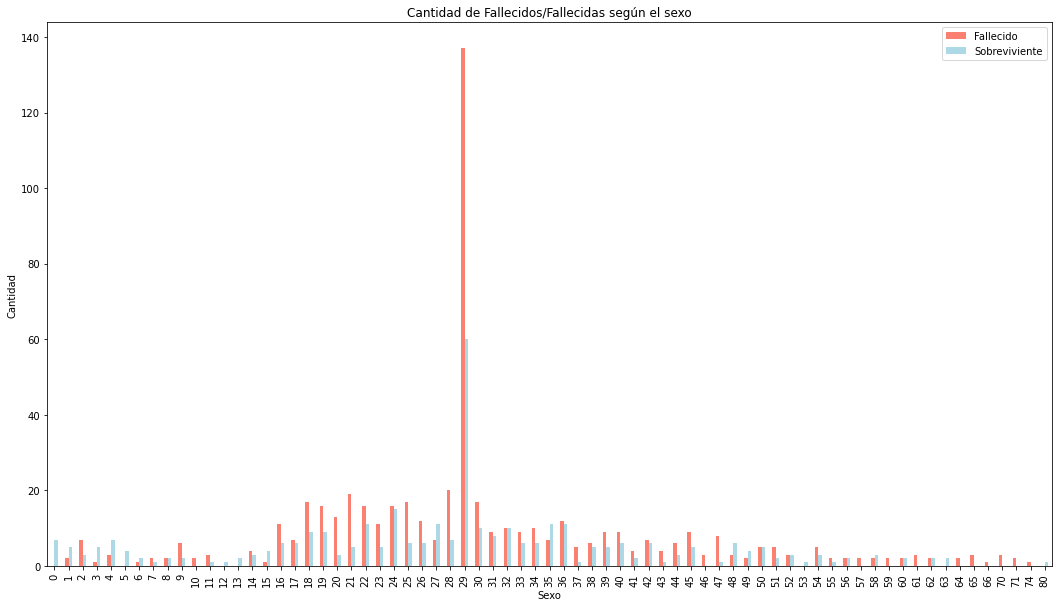

In [18]:
#ahora haremos por edad
ax = pd.crosstab(df['Age'], df['Target']).plot(kind = 'bar', color = ['salmon', 'lightblue'], figsize = (18, 10))
plt.title('Cantidad de Fallecidos/Fallecidas según el sexo')
plt.xlabel('Sexo')
plt.legend(['Fallecido', 'Sobreviviente'])
plt.ylabel('Cantidad');

In [19]:
df[df['Age'] == 29].count()

PassengerId    197
Pclass         197
Name           197
Sex            197
Age            197
SibSp          197
Parch          197
Ticket         197
Fare           197
Cabin           24
Embarked       197
Target         197
dtype: int64

Haremos un gráfico scatter que represente la edad y la tarifa

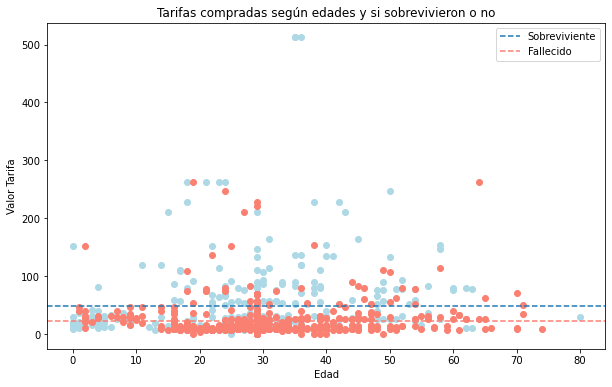

In [20]:
plt.figure(figsize = (10, 6))

#gráfico los sobrevivientes
plt.scatter(df.Age[df.Target == 1],
           df.Fare[df.Target == 1],
           c = 'lightblue')

#grafico los fallecidos
plt.scatter(df.Age[df.Target == 0],
           df.Fare[df.Target == 0],
           c = 'salmon')

#promedio
plt.axhline(df.Fare[df.Target == 1].mean(), linestyle = '--') #linea que representa el promedio de tarifas en sobrev
plt.axhline(df.Fare[df.Target == 0].mean(), linestyle = '--', c = 'salmon') #tarifa que representa tarifa en muertos
#información
plt.title('Tarifas compradas según edades y si sobrevivieron o no')
plt.xlabel('Edad')
plt.ylabel('Valor Tarifa')
plt.legend(['Sobreviviente', 'Fallecido']);

In [21]:
#obtenemos la diferencia 
diff = ( df.Fare[df.Target == 1].mean() - df.Fare[df.Target == 0].mean() )
round(diff, 3)

26.278

Podemos observar que, según las tarifas de los sobrevivientes, era un poco más alta con respecto a los fallecidos, vemos que no es la gran diferencia, ya que es de 21.773 dolares.

## Ahora observaremos resumenes estadísticos de cada uno de los fallecidos/sobrevivientes y sus edades

In [22]:
df.Age[df.Target == 1].describe()

count    342.000000
mean      28.426901
std       13.796348
min        0.000000
25%       21.000000
50%       29.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

Podemos ver que tenemos un total de 123 personas que sobrevivieron. La media es de 32 años. La desviación Típica muestra es del 14, es decir, que hay una diferencia (tanto para la derecha como izquierda) de 14 años con respecto a la media (32). La edad mínima es de 0.9 años (podría leerse como meses). El primero cuartil nos dice que el 25% o menos de las personas poseía 23 años de edad. El segundo cuartil (la mediana) nos dice que es 33 años y el último cuartil nos dice que el 75% de las personas, tenían 42 años o menos. La persona con mayor edad que se pudo salvar, es de 80 años

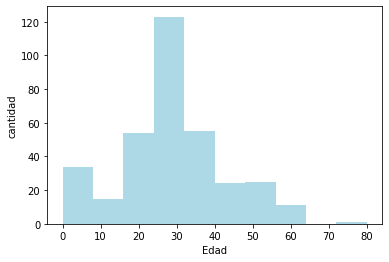

In [23]:
#crearemos un histograma para mejor visualización
plt.hist(df.Age[df.Target == 1], color = 'lightblue');
plt.xlabel('Edad')
plt.ylabel('cantidad');

Al ojo podemos observar en esta distribución que hay un solo outlier (80), pero podemos demostrar esto de mejor manera con un boxplot o una caja de bigotes

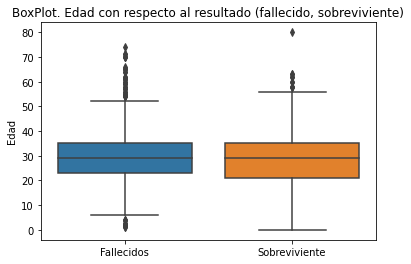

In [24]:
sns.boxplot(x = 'Target', y = 'Age', data = df)
plt.title('BoxPlot. Edad con respecto al resultado (fallecido, sobreviviente)')
plt.xlabel(None)
plt.ylabel('Edad')
plt.xticks(ticks = [0,1],labels = ['Fallecidos', 'Sobreviviente']);

Podemos darnos cuenta que efectivamente en el caso de los sobrevivientes, tenemos un outlier (dato atípico) de 80 años. En el caso de los fallecidos, la variabilidad de edad es mayor, mientras que los sobrevivientes es más acotada. 

Ahora un resumen estadistico de los que fallecieron

In [25]:
df.Age[df.Target == 0].describe()

count    549.000000
mean      30.240437
std       12.463835
min        1.000000
25%       23.000000
50%       29.000000
75%       35.000000
max       74.000000
Name: Age, dtype: float64

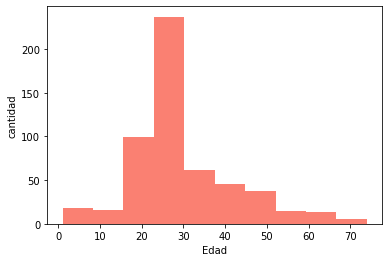

In [26]:
#crearemos un histograma para mejor visualización
plt.hist(df.Age[df.Target == 0], color = 'salmon');
plt.xlabel('Edad')
plt.ylabel('cantidad');

Veremos ahora si encontramos algún patrón con respecto al tipo de embarcación que poseía la persona

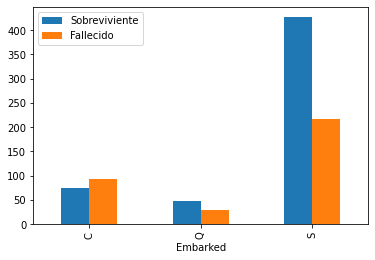

In [27]:
pd.crosstab(df.Embarked, df.Target).plot(kind = 'bar')
plt.legend(['Sobreviviente', 'Fallecido'])

## Identificando correlación entre variables y la etiqueta a predecir

In [28]:
corr = df.corr()
corr

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Target
PassengerId,1.000000,-0.035144,0.033741,-0.057527,-0.001652,0.012658,-0.005007
Pclass,-0.035144,1.000000,-0.335071,0.083081,0.018443,-0.549500,-0.338481
Age,0.033741,-0.335071,1.000000,-0.232743,-0.176744,0.093856,-0.067809
SibSp,-0.057527,0.083081,-0.232743,1.000000,0.414838,0.159651,-0.035322
Parch,-0.001652,0.018443,-0.176744,0.414838,1.000000,0.216225,0.081629
Fare,0.012658,-0.549500,0.093856,0.159651,0.216225,1.000000,0.257307
Target,-0.005007,-0.338481,-0.067809,-0.035322,0.081629,0.257307,1.000000


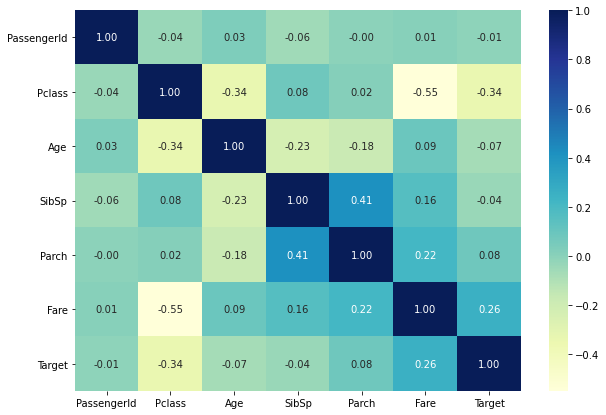

In [29]:
#haremos mas visual 
fig, ax = plt.subplots(figsize = (10, 7))
ax = sns.heatmap(corr,
                annot = True,
                fmt='.2f',
                cmap = 'YlGnBu')

## Entrenamiento del Modelo
En este caso tenemos un problema de clasificación, por lo que tendremos que optar por un estimador que nos otorga Sklearn referido a este tipo de problema, el cual podemos encontrar aquí:  https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [30]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Target
0,1,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,0


En este caso, no necesitaremos ciertas columnas, tales como el id del pasajero, el nombre ni el ticket y veremos

In [31]:
#hacemos un respaldo
df1 = df.drop(['PassengerId', 'Name', 'Ticket'], axis = 1)

In [32]:
df1.shape

(891, 9)

In [33]:
#separaremos la data
from sklearn.model_selection import train_test_split
X = df1.drop('Target', axis = 1)
y = df1['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [34]:
X_train.shape, y_train.shape

((712, 8), (712,))

Importamos el modelo

In [35]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [36]:
#entrenamos
#clf.fit(X_train, y_test)
#quitar comentario para apreciar error

In [37]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Target
0,1,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,0


Nos da un error con respecto al sexo, el cual es una variable en formato string, así que vamos a convertir las variables que están en string a categorica y posteriormente obtener su código

In [38]:
df['Sex_Code'] = df.Sex.astype('category').cat.codes

In [39]:
df[['Sex', 'Sex_Code']]

,Sex,Sex_Code
0,male,1
1,female,0
2,female,0
3,female,0
4,male,1
...,...,...
886,male,1
887,female,0
888,female,0
889,male,1


## Ahora que nos dimos cuenta que ciertas variables no nos sirven y que todo debe estar en formato numerico, haremos el proceso nuevamente, pero sólo con las variables numéricas

In [40]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Target,Sex_Code
0,1,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,1,0
2,3,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,1,0
4,5,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,0,1


In [41]:
def count_mio(array):
    valor = 0
    for _ in array:
        valor += 1
    return valor

    

In [83]:
len(np.unique(df.Ticket))

681

In [43]:
print(count_mio(np.unique(df.Parch)))

7


In [44]:
df['Embarked_Code'] = df.Embarked.astype('category').cat.codes + 1

In [45]:
min(df['Embarked_Code'])

0

In [46]:
df_numerico = df[['Pclass', 'Age', 'Fare', 'Sex_Code', 'Target', 'Embarked_Code', 'Parch']]

In [47]:
df_numerico.head()

,Pclass,Age,Fare,Sex_Code,Target,Embarked_Code,Parch
0,3,22,7.2500,1,0,3,0
1,1,38,71.2833,0,1,1,0
2,3,26,7.9250,0,1,3,0
3,1,35,53.1000,0,1,3,0
4,3,35,8.0500,1,0,3,0


In [89]:
df_numerico['Fare'] = np.ceil(df_numerico['Fare'])

<ipython-input-89-e47a5a474323>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numerico['Fare'] = np.ceil(df_numerico['Fare'])


In [90]:
#consultamos si posee nulos
df_numerico.isna().sum()

Pclass           0
Age              0
Fare             0
Sex_Code         0
Target           0
Embarked_Code    0
Parch            0
dtype: int64

## Vemos que en la edad tenemos 177 nulos, por lo que vamos a rellenar esa edad con la mediana, si nos complica, borraremos los nulos

In [91]:
df_numerico.Age.median()

29.0

In [51]:
df_numerico['Age'].fillna(df_numerico.Age.median(), inplace = True)

/.env/lib/python3.9/site-packages/pandas/core/series.py:4460: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [52]:
#borrando nulos
df_numerico.dropna(inplace=True)

<ipython-input-52-6f4c410bf60e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numerico.dropna(inplace=True)


In [53]:
#volvemos a preguntar si posee nulos
df_numerico.isna().sum()

Pclass           0
Age              0
Fare             0
Sex_Code         0
Target           0
Embarked_Code    0
Parch            0
dtype: int64

In [54]:
df_numerico.head()

,Pclass,Age,Fare,Sex_Code,Target,Embarked_Code,Parch
0,3,22,3.0,1,0,3,0
1,1,38,1.0,0,1,1,0
2,3,26,3.0,0,1,3,0
3,1,35,1.0,0,1,3,0
4,3,35,3.0,1,0,3,0


## Separaremos la data nuevamente en entrenamiento y test

In [55]:
#separaremos la data
from sklearn.model_selection import train_test_split
X = df_numerico.drop('Target', axis = 1)
y = df_numerico['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [56]:
X.shape, y.shape

((891, 6), (891,))

## Ahora sí podremos entrenar el modelo sin mayores problemas

In [57]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=10000)

In [58]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10000)

In [59]:
clf.score(X_test, y_test)

0.8100558659217877

### Intentaremos entrenar con toda la data, para ver si el modelo logra aprender más con más datos, ya que el score anterior es muy bajo

In [69]:
X_train2 = df_numerico.drop('Target', axis = 1)
y_train2 = df_numerico['Target']
X_train2.shape, y_train2.shape

((891, 6), (891,))

In [70]:
clf.fit(X_train2, y_train2)

RandomForestClassifier(max_depth=10000)

In [72]:
clf.score(X_train2, y_train2)

0.9124579124579124

## Mejorando el modelo con GridSearchCV

In [73]:
from sklearn.model_selection import GridSearchCV
np.random.seed(52)

grid = {
    'n_estimators' : [100, 200, 300, 400, 1000, 600, 500],
    'max_depth' : [10, 20, 30, 40, 50, 60, 100, 200, 500]
}

gs_clf = GridSearchCV(estimator = clf,
                        param_grid=grid,
                        cv = 5, 
                        verbose = 2)
                        
gs_clf.fit(X_train2, y_train2)

... max_depth=50, n_estimators=500, total=   3.3s
[CV] max_depth=60, n_estimators=100 ..................................
[CV] ................... max_depth=60, n_estimators=100, total=   0.7s
[CV] max_depth=60, n_estimators=100 ..................................
[CV] ................... max_depth=60, n_estimators=100, total=   0.7s
[CV] max_depth=60, n_estimators=100 ..................................
[CV] ................... max_depth=60, n_estimators=100, total=   0.7s
[CV] max_depth=60, n_estimators=100 ..................................
[CV] ................... max_depth=60, n_estimators=100, total=   0.7s
[CV] max_depth=60, n_estimators=100 ..................................
[CV] ................... max_depth=60, n_estimators=100, total=   0.7s
[CV] max_depth=60, n_estimators=200 ..................................
[CV] ................... max_depth=60, n_estimators=200, total=   1.3s
[CV] max_depth=60, n_estimators=200 ..................................
[CV] ................... ma

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=10000),
             param_grid={'max_depth': [10, 20, 30, 40, 50, 60, 100, 200, 500],
                         'n_estimators': [100, 200, 300, 400, 1000, 600, 500]},
             verbose=2)

In [76]:
gs_clf.best_params_

{'max_depth': 50, 'n_estimators': 200}

In [77]:
gs_clf.score(X_train2, y_train2)

0.9124579124579124

### Según nuestro GridSearch, los mejores parámetros son de un max_depth de 5 y numero de estimadores (arboles) de 200. Es hora de llamar a nuestro set de datos para testear

In [78]:
df_test = pd.read_csv('./data/test.csvb')

In [79]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Para poder predecir, necesitaremos que esté en el mismo formato que pasamos anteriormente

In [82]:
df1.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Target
0,3,male,22,1,0,7.2500,NaN,S,0
1,1,female,38,1,0,71.2833,C85,C,1
2,3,female,26,0,0,7.9250,NaN,S,1
3,1,female,35,1,0,53.1000,C123,S,1
4,3,male,35,0,0,8.0500,NaN,S,0


In [81]:
#recordaremos nuestro set anterior
df_numerico.head()

,Pclass,Age,Fare,Sex_Code,Target,Embarked_Code,Parch
0,3,22,3.0,1,0,3,0
1,1,38,1.0,0,1,1,0
2,3,26,3.0,0,1,3,0
3,1,35,1.0,0,1,3,0
4,3,35,3.0,1,0,3,0


In [86]:
def format_df(df):
    df['Sex_Code'] = df.Sex.astype('category').cat.codes
    df['Embarked_Code'] = df.Embarked.astype('category').cat.codes + 1
    df_format = df[['Pclass', 'Age', 'Fare', 'Sex_Code', 'Embarked_Code', 'Parch']]
    return df_format
    
    
    

In [87]:
df_test = format_df(df_test)

In [88]:
df_test.head()

,Pclass,Age,Fare,Sex_Code,Embarked_Code,Parch
0,3,34.5,7.8292,1,2,0
1,3,47.0,7.0000,0,3,0
2,2,62.0,9.6875,1,2,0
3,3,27.0,8.6625,1,3,0
4,3,22.0,12.2875,0,3,1


In [92]:
df_test['Age'] = np.ceil(df_test['Age'])
df_test['Fare'] = np.ceil(df_test['Fare'])

<ipython-input-92-cf689bade9e7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Age'] = np.ceil(df_test['Age'])
<ipython-input-92-cf689bade9e7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Fare'] = np.ceil(df_test['Fare'])


In [93]:
df_test.head()

,Pclass,Age,Fare,Sex_Code,Embarked_Code,Parch
0,3,35.0,8.0,1,2,0
1,3,47.0,7.0,0,3,0
2,2,62.0,10.0,1,2,0
3,3,27.0,9.0,1,3,0
4,3,22.0,13.0,0,3,1


In [95]:
df_test.isna().sum()

Pclass            0
Age              86
Fare              1
Sex_Code          0
Embarked_Code     0
Parch             0
dtype: int64

In [96]:
#borrando nulos
df_test.dropna(inplace=True)

<ipython-input-96-88a885219f4d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.dropna(inplace=True)


In [97]:
y_preds = gs_clf.predict(df_test)

In [107]:
df_test[0:1]

,Pclass,Age,Fare,Sex_Code,Embarked_Code,Parch
0,3,35.0,8.0,1,2,0


In [99]:
y_preds[0]

0

## Podemos observar que la primera observación puede ser mas correcta: tenemos que es de tercera clase, 35 años, la tarifa no ha salido excesiva

In [110]:
df_test[0:10]

,Pclass,Age,Fare,Sex_Code,Embarked_Code,Parch
0,3,35.0,8.0,1,2,0
1,3,47.0,7.0,0,3,0
2,2,62.0,10.0,1,2,0
3,3,27.0,9.0,1,3,0
4,3,22.0,13.0,0,3,1
5,3,14.0,10.0,1,3,0
6,3,30.0,8.0,0,2,0
7,2,26.0,29.0,1,3,1
8,3,18.0,8.0,0,1,0
9,3,21.0,25.0,1,3,0


In [111]:
y_preds[:10]

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0])

In [113]:
#Vamos a integrar el target al dataframe
df_test['Target']  = y_preds

<ipython-input-113-3db3d4c36951>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Target']  = y_preds


In [116]:
df_test[df_test.Pclass == 1]

,Pclass,Age,Fare,Sex_Code,Embarked_Code,Parch,Target
11,1,46.0,26.0,1,3,0,0
12,1,23.0,83.0,0,3,0,1
14,1,47.0,62.0,0,3,0,0
20,1,55.0,60.0,1,1,0,0
23,1,21.0,62.0,1,1,1,0
...,...,...,...,...,...,...,...
403,1,17.0,48.0,1,3,0,0
404,1,43.0,28.0,1,1,0,0
407,1,50.0,212.0,1,1,1,0
411,1,37.0,90.0,0,2,0,1


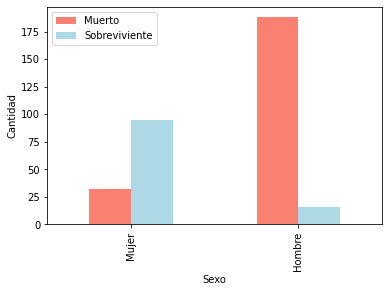

In [128]:
ax = pd.crosstab(df_test.Sex_Code, df_test.Target).plot(kind = 'bar', color = ['Salmon', 'lightblue']);
plt.xlabel('Sexo')
plt.ylabel('Cantidad')
plt.xticks([0,1], ['Mujer', 'Hombre'])
plt.legend(labels = ['Muerto', 'Sobreviviente']);

## Feature Importance
Ya creado el modelo, veremos cuales fueron las variables que más relación tuvieron con la predicción

In [135]:
clf_coef = gs_clf.best_estimator_.feature_importances_

In [137]:
#visualizaremos mejor esta información
dict_coef = dict(zip(clf_coef, df_test.columns))

In [140]:
dict_coef

{0.07873298158530104: 'Pclass',
 0.40404616607365673: 'Age',
 0.0719462303734533: 'Fare',
 0.34492609736260216: 'Sex_Code',
 0.04596160210692531: 'Embarked_Code',
 0.05438692249806142: 'Parch'}

Dentro de todo los parámetros determinantes fueron: 
* la clase en su menor medida, ya que muchos hombres de primera clase también murieron
* la edad 
* el sexo de la persona

## Guardando modelo y dataframe
Una vez ya creado el modelo y hechas las predicciones, procederemos a guardar el modelo y exportar nuestro dataframe a un csv para futuras lecturas

In [132]:
#guardaremos con pickle
import pickle
pickle.dump(gs_clf, open('./data/gs_random_forest_titanic.pkl', 'wb'))


In [147]:
#exportando el csv
df_test.to_csv('./data/prediction_test.csv',index = False)

# Trabajo Concluido
Hemos creado un modelo que clasifique si una persona sobrevivirá a la tragedia del titanic según parámetros. Hemos hecho análisis estadísticos y hemos sacado conclusiones respecto a los parámetros importantes